In [1]:
%pip install -q datasets

Note: you may need to restart the kernel to use updated packages.


In [2]:
from sklearn.metrics import classification_report, accuracy_score

In [3]:
from datasets import load_dataset

dataset_laptop = load_dataset("jakartaresearch/semeval-absa", name='laptop')
dataset_restaurant = load_dataset("jakartaresearch/semeval-absa", name='restaurant')
dataset_fabsa = load_dataset("jordiclive/FABSA")

README.md:   0%|          | 0.00/3.56k [00:00<?, ?B/s]

semeval-absa.py:   0%|          | 0.00/5.49k [00:00<?, ?B/s]

laptop/train/0000.parquet:   0%|          | 0.00/225k [00:00<?, ?B/s]

laptop/validation/0000.parquet:   0%|          | 0.00/55.9k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/3048 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/800 [00:00<?, ? examples/s]

restaurant/train/0000.parquet:   0%|          | 0.00/231k [00:00<?, ?B/s]

restaurant/validation/0000.parquet:   0%|          | 0.00/69.6k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/3044 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/800 [00:00<?, ? examples/s]

README.md:   0%|          | 0.00/5.43k [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/747k [00:00<?, ?B/s]

validation-00000-of-00001.parquet:   0%|          | 0.00/105k [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/158k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/7930 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/1057 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/1587 [00:00<?, ? examples/s]

# Deberta for ATSC

In [5]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification, pipeline

# Load the ABSA model and tokenizer
model_name = "yangheng/deberta-v3-base-absa-v1.1"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)

classifier = pipeline("text-classification", model=model, tokenizer=tokenizer, device='cpu')

Device set to use cpu


## Evaluate on SemEval on the domain: laptops

  0%|          | 0/800 [00:00<?, ?it/s]

              precision    recall  f1-score   support

    negative       0.69      0.94      0.80       128
     neutral       0.78      0.57      0.66       169
    positive       0.91      0.91      0.91       341

    accuracy                           0.83       638
   macro avg       0.79      0.81      0.79       638
weighted avg       0.83      0.83      0.82       638



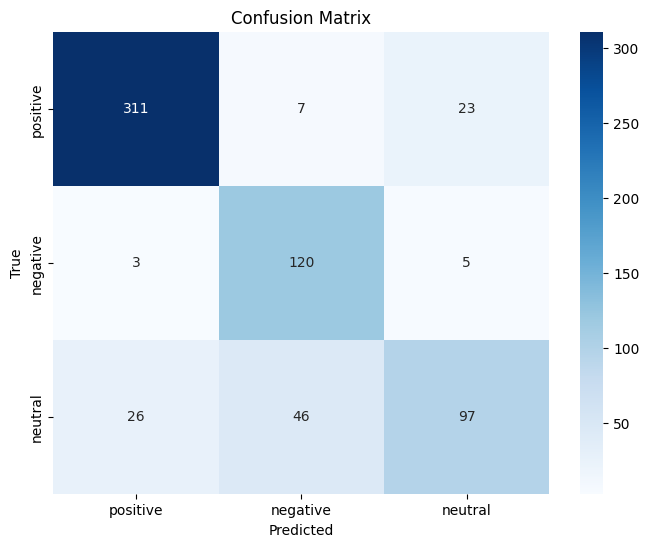

In [6]:
from tqdm.auto import tqdm
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

labels = []
predictions = []

POLARITY_SET = set(['positive', 'negative', 'neutral'])

for i, data in enumerate(tqdm(dataset_laptop['validation'])):
    terms = data['aspects']['term']
    polarities = data['aspects']['polarity']

    for term, polarity in zip(terms, polarities):
        if polarity not in POLARITY_SET or term == '':
            continue

        prediction = classifier(data['text'], text_pair=term)
        predictions.append(prediction[0]['label'].lower())
        labels.append(polarity)

print(classification_report(labels, predictions))

# Confusion Matrix
conf_matrix = confusion_matrix(labels, predictions, labels=list(POLARITY_SET))

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=POLARITY_SET, yticklabels=POLARITY_SET)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()


## Evaluate on SemEval on the domain: restaurant

  0%|          | 0/800 [00:00<?, ?it/s]

              precision    recall  f1-score   support

    negative       0.85      0.80      0.82       196
     neutral       0.56      0.78      0.66       196
    positive       0.94      0.86      0.90       728

    accuracy                           0.84      1120
   macro avg       0.79      0.81      0.79      1120
weighted avg       0.86      0.84      0.84      1120



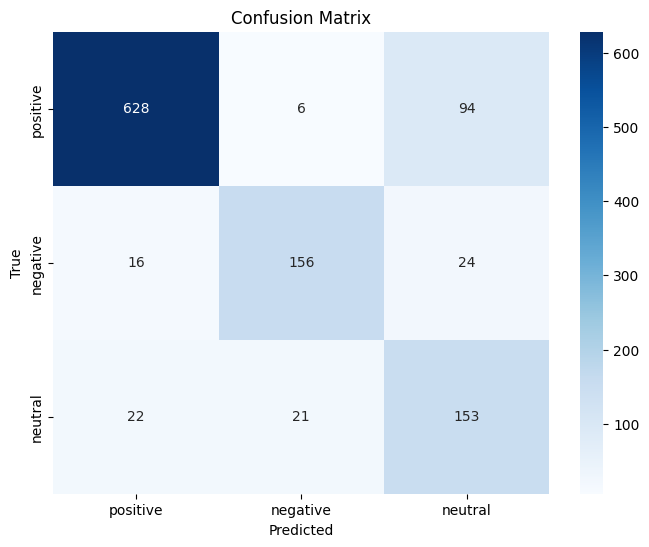

In [7]:
from tqdm.auto import tqdm
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

labels = []
predictions = []

POLARITY_SET = set(['positive', 'negative', 'neutral'])

for i, data in enumerate(tqdm(dataset_restaurant['validation'])):
    terms = data['aspects']['term']
    polarities = data['aspects']['polarity']

    for term, polarity in zip(terms, polarities):
        if polarity not in POLARITY_SET or term == '':
            continue

        prediction = classifier(data['text'], text_pair=term)
        predictions.append(prediction[0]['label'].lower())
        labels.append(polarity)

print(classification_report(labels, predictions))

# Confusion Matrix
conf_matrix = confusion_matrix(labels, predictions, labels=list(POLARITY_SET))

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=POLARITY_SET, yticklabels=POLARITY_SET)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()


In [8]:
set(predictions), set(labels), set(predictions) == set(labels)

({'negative', 'neutral', 'positive'},
 {'negative', 'neutral', 'positive'},
 True)

## Evaluate on FABSA

  0%|          | 0/1587 [00:00<?, ?it/s]

              precision    recall  f1-score   support

    negative       0.95      0.67      0.79       896
     neutral       0.32      0.73      0.45        91
    positive       0.88      0.95      0.92      1825

    accuracy                           0.86      2812
   macro avg       0.72      0.78      0.72      2812
weighted avg       0.89      0.86      0.86      2812



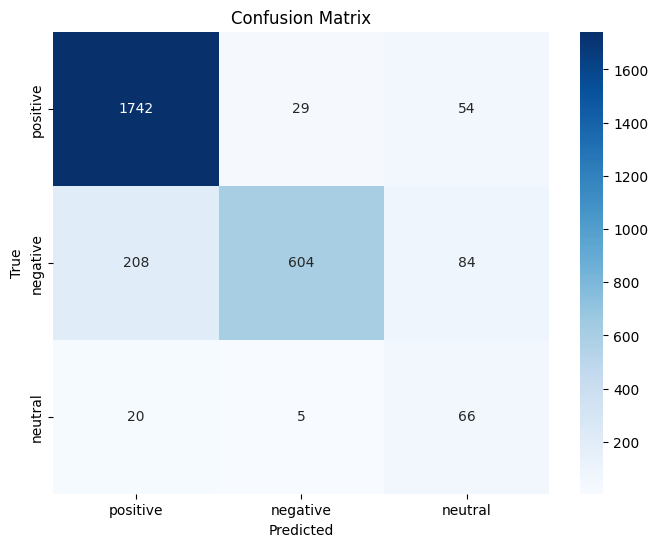

In [10]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

labels = []
predictions = []

POLARITY_SET = set(['positive', 'negative', 'neutral'])

for i, data in enumerate(tqdm(dataset_fabsa['test'])):
    for term, polarity in data['labels']:
        if polarity not in POLARITY_SET or term == '':
            continue

        prediction = classifier(data['text'], text_pair=term)
        predictions.append(prediction[0]['label'].lower())
        labels.append(polarity)

print(classification_report(labels, predictions))

# Confusion Matrix
conf_matrix = confusion_matrix(labels, predictions, labels=list(POLARITY_SET))

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=POLARITY_SET, yticklabels=POLARITY_SET)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

In [11]:
# from tqdm.auto import tqdm
# from sklearn.metrics import classification_report, accuracy_score


# labels = []
# predictions = []

# POLARITY_SET = set(['positive', 'negative', 'neutral'])

# for i, data in enumerate(tqdm(dataset_fabsa['test'])):
#     for term, polarity in data['labels']:
#         if polarity not in POLARITY_SET or term == '':
#             continue

#         prediction = classifier(data['text'], text_pair=term.split(': ')[-1])
#         predictions.append(prediction[0]['label'].lower())
#         labels.append(polarity)

# print(classification_report(labels, predictions))
# print(f"accuracy_score = {accuracy_score(labels, predictions)}")

## Sanity Check

In [12]:
text = """Apart from a few "buffering moments" ordering our shopping has never been easier"""
{
    aspect: classifier(text, text_pair=aspect)[0]['label']
    for aspect in (
        [
            "speed",
            "velocity",
            "waiter",
            "weather",
            "shoes",
            "United States",
            "North Korea",
            "Iran",
            "United Kingdom",
        ]
    )
}

{'speed': 'Positive',
 'velocity': 'Positive',
 'waiter': 'Positive',
 'weather': 'Positive',
 'shoes': 'Positive',
 'United States': 'Positive',
 'North Korea': 'Negative',
 'Iran': 'Positive',
 'United Kingdom': 'Positive'}

# InstructABSA for ATSC
It uses a trained Tk-base-pos-def model

In [14]:
# Use a pipeline as a high-level helper
from transformers import pipeline

classifier = pipeline("text2text-generation", model="kevinscaria/atsc_tk-instruct-base-def-pos-neg-neut-combined", device='cpu')

Device set to use cpu


In [15]:
bos_instruction = """Definition: The output will be 'positive' if the aspect identified in the sentence contains a positive sentiment. If the sentiment of the identified aspect in the input is negative the answer will be 'negative'.
        Otherwise, the output should be 'neutral'. For aspects which are classified as noaspectterm, the sentiment is none.
        Positive example 1-
        input: With the great variety on the menu , I eat here often and never get bored. The aspect is menu.
        output: positive
        Positive example 2-
        input: Great food, good size menu, great service and an unpretensious setting. The aspect is food.
        output: positive
        Negative example 1-
        input: They did not have mayonnaise, forgot our toast, left out ingredients (ie cheese in an omelet), below hot temperatures and the bacon was so over cooked it crumbled on the plate when you touched it. The aspect is toast.
        output: negative
        Negative example 2-
        input: The seats are uncomfortable if you are sitting against the wall on wooden benches. The aspect is seats.
        output: negative
        Neutral example 1-
        input: I asked for seltzer with lime, no ice. The aspect is seltzer with lime.
        output: neutral
        Neutral example 2-
        input: They wouldnt even let me finish my glass of wine before offering another. The aspect is glass of wine.
        output: neutral
        Now complete the following example-
        input: """

sep_instruction = ' The aspect is '
eos_instruction = '.\noutput:'

text = "Boot time is super fast, around anywhere from 35 seconds to 1 minute."
aspect = "Boot time"

input_text = bos_instruction + text + sep_instruction + aspect + eos_instruction

classifier(input_text, max_new_tokens=1)[0]['generated_text']

'positive'

## Sanity Check

In [16]:
text = "Apart from a few \"buffering moments\" ordering our shopping has never been easier"

{
    aspect: classifier(bos_instruction + text + sep_instruction + aspect + eos_instruction, max_new_tokens=1)[0]['generated_text']
    for aspect in (
        [
            "speed",
            "velocity",
            "waiter",
            "weather",
            "shoes",
            "North Korea",
            "United States",
            "Iran"
        ]
    )
}

{'speed': 'positive',
 'velocity': 'positive',
 'waiter': 'positive',
 'weather': 'negative',
 'shoes': 'positive',
 'North Korea': 'negative',
 'United States': 'neutral',
 'Iran': 'positive'}

## Evaluate on SemEval on the domain: laptop

  0%|          | 0/800 [00:00<?, ?it/s]

              precision    recall  f1-score   support

    negative       0.65      0.89      0.75       128
     neutral       0.87      0.49      0.62       169
    positive       0.87      0.94      0.90       341

    accuracy                           0.81       638
   macro avg       0.80      0.77      0.76       638
weighted avg       0.83      0.81      0.80       638



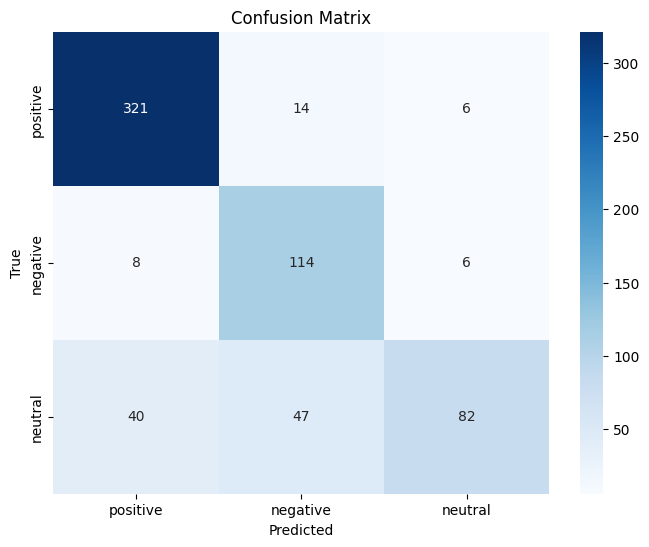

In [17]:
from tqdm.auto import tqdm
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

labels = []
predictions = []

for i, data in enumerate(tqdm(dataset_laptop['validation'])):
    for term, polarity in zip(data['aspects']['term'], data['aspects']['polarity']):
        if polarity == 'conflict':
            continue
        if term == '':
            pass
            # predictions.append('')
        else:
            aspect = term
            text = data['text']
            input_text = bos_instruction + text + sep_instruction + aspect + eos_instruction
            prediction = classifier(input_text, max_new_tokens=1)
            predictions.append(prediction[0]['generated_text'].lower())
            labels.append(polarity)

print(classification_report(labels, predictions))

# Confusion Matrix
unique_labels = list(set(labels + predictions))  # Ensure labels cover both true and predicted
conf_matrix = confusion_matrix(labels, predictions, labels=unique_labels)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=unique_labels, yticklabels=unique_labels)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()


## Evaluate on SemEval on the domain: restaurant

  0%|          | 0/800 [00:00<?, ?it/s]

              precision    recall  f1-score   support

    negative       0.80      0.88      0.84       196
     neutral       0.77      0.43      0.55       196
    positive       0.89      0.97      0.93       728

    accuracy                           0.86      1120
   macro avg       0.82      0.76      0.77      1120
weighted avg       0.85      0.86      0.85      1120



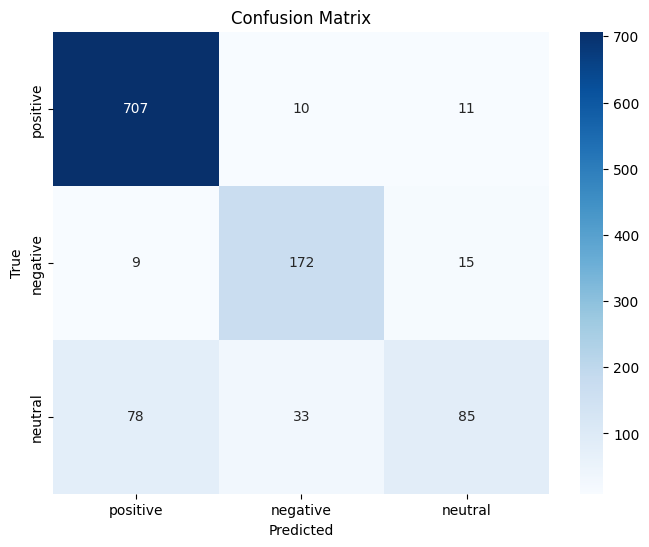

In [18]:
from tqdm.auto import tqdm
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

labels = []
predictions = []

for i, data in enumerate(tqdm(dataset_restaurant['validation'])):
    for term, polarity in zip(data['aspects']['term'], data['aspects']['polarity']):
        if polarity == 'conflict':
            continue
        if term == '':
            pass
            # predictions.append('')
        else:
            aspect = term
            text = data['text']
            input_text = bos_instruction + text + sep_instruction + aspect + eos_instruction
            prediction = classifier(input_text, max_new_tokens=1)
            predictions.append(prediction[0]['generated_text'].lower())
            labels.append(polarity)

print(classification_report(labels, predictions))

# Confusion Matrix
unique_labels = list(set(labels + predictions))  # Ensure labels cover both true and predicted
conf_matrix = confusion_matrix(labels, predictions, labels=unique_labels)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=unique_labels, yticklabels=unique_labels)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()


In [19]:
set(predictions), set(labels), set(predictions) == set(labels)

({'negative', 'neutral', 'positive'},
 {'negative', 'neutral', 'positive'},
 True)

## Evaluate on FABSA

  0%|          | 0/1587 [00:00<?, ?it/s]

Token indices sequence length is longer than the specified maximum sequence length for this model (614 > 512). Running this sequence through the model will result in indexing errors


              precision    recall  f1-score   support

    negative       0.93      0.12      0.21       896
     neutral       0.08      0.92      0.14        91
    positive       0.96      0.85      0.90      1825

    accuracy                           0.62      2812
   macro avg       0.65      0.63      0.42      2812
weighted avg       0.92      0.62      0.65      2812



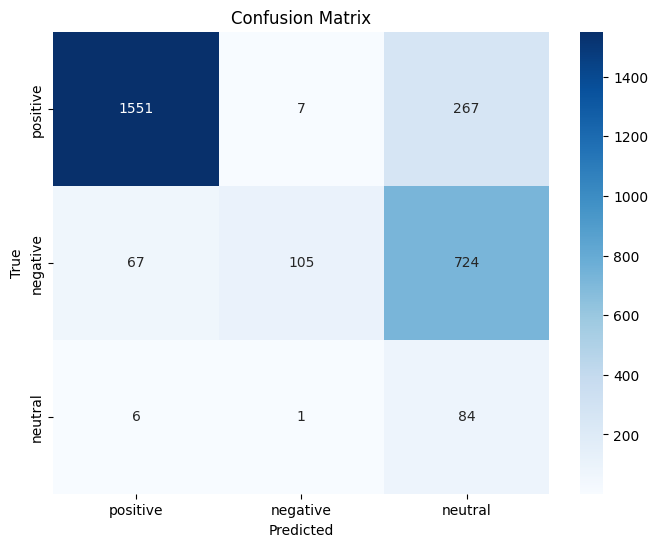

In [21]:
from tqdm.auto import tqdm
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

labels = []
predictions = []

for i, data in enumerate(tqdm(dataset_fabsa['test'])):
    for term, polarity in data['labels']:
        if polarity not in POLARITY_SET or term == "":
            continue
        input_text = (
            bos_instruction
            + data['text']
            + sep_instruction
            + aspect.split(": ")[-1]
            + eos_instruction
        )
        
        prediction = classifier(input_text, max_new_tokens=1)
        predictions.append(prediction[0]['generated_text'].lower())
        labels.append(polarity)

print(classification_report(labels, predictions))

# Confusion Matrix
unique_labels = list(set(labels + predictions))  # Ensure labels cover both true and predicted
conf_matrix = confusion_matrix(labels, predictions, labels=unique_labels)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=unique_labels, yticklabels=unique_labels)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()


In [22]:
# from tqdm.auto import tqdm
# from sklearn.metrics import classification_report, accuracy_score


# labels = []
# predictions = []

# POLARITY_SET = set(['positive', 'negative', 'neutral'])

# for i, data in enumerate(tqdm(dataset_fabsa['test'])):
#     for term, polarity in data['labels']:
#         if polarity not in POLARITY_SET or term == '':
#             continue

#         input_text = (
#             bos_instruction
#             + data['text']
#             + sep_instruction
#             + aspect.split(": ")[-1]
#             + eos_instruction
#         )
#         prediction = classifier(input_text, max_new_tokens=1)
#         predictions.append(prediction[0]['generated_text'].lower())
#         labels.append(polarity)

# print(classification_report(labels, predictions))
# print(f"accuracy_score = {accuracy_score(labels, predictions)}")

# PyABSA

In [ ]:
%pip install -qU pyabsa

In [ ]:
from pyabsa import AspectTermExtraction as ATEPC


aspect_extractor = ATEPC.AspectExtractor('multilingual', auto_device=True)

In [ ]:
instances = [
    # "The battery life of this phone is incredible, but the screen cracks too easily and the camera quality is disappointing.",
    # "While the hotel's location is perfect and the breakfast delicious, the room was noisy and the staff unhelpful.",
    "Apart from a few \"buffering moments\" ordering our shopping has never been easier"
]

# instance inference
atepc_result = aspect_extractor.predict(instances,
    save_result=True,
    print_result=True,  # print the result
    ignore_error=True,  # ignore the error when the model cannot predict the input
)

In [ ]:
from pprint import pprint

pprint(atepc_result, width=400)